# Read and visualise the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#import all the necessary libraries
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read the data
country = pd.read_csv("Country-data.csv")

In [5]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# basics of the df
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Clean the data

In [9]:
# missing values
round(100*(country.isnull().sum())/len(country), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

# Exploratory Data Analytics

# Converting export, health, imports into Numbers

In [10]:
country["exports"] = country['exports'].apply(lambda x: x/100)
country["exports"] = country['exports']*country['gdpp']

country["health"] = country['health'].apply(lambda x: x/100)
country["health"] = country['health']*country['gdpp']

country["imports"] = country['imports'].apply(lambda x: x/100)
country["imports"] = country['imports']*country['gdpp']

In [11]:
s = country.copy()

In [12]:
country.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


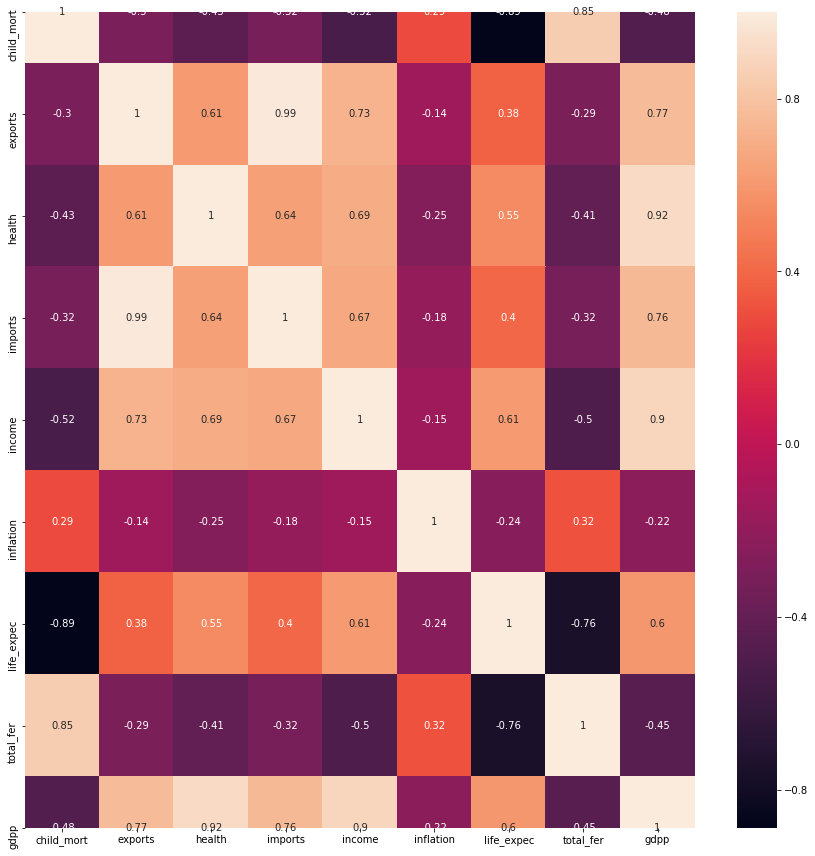

In [13]:
plt.figure(figsize = (15,15))
sns.heatmap(country.corr(), annot = True)

<Figure size 1440x576 with 0 Axes>

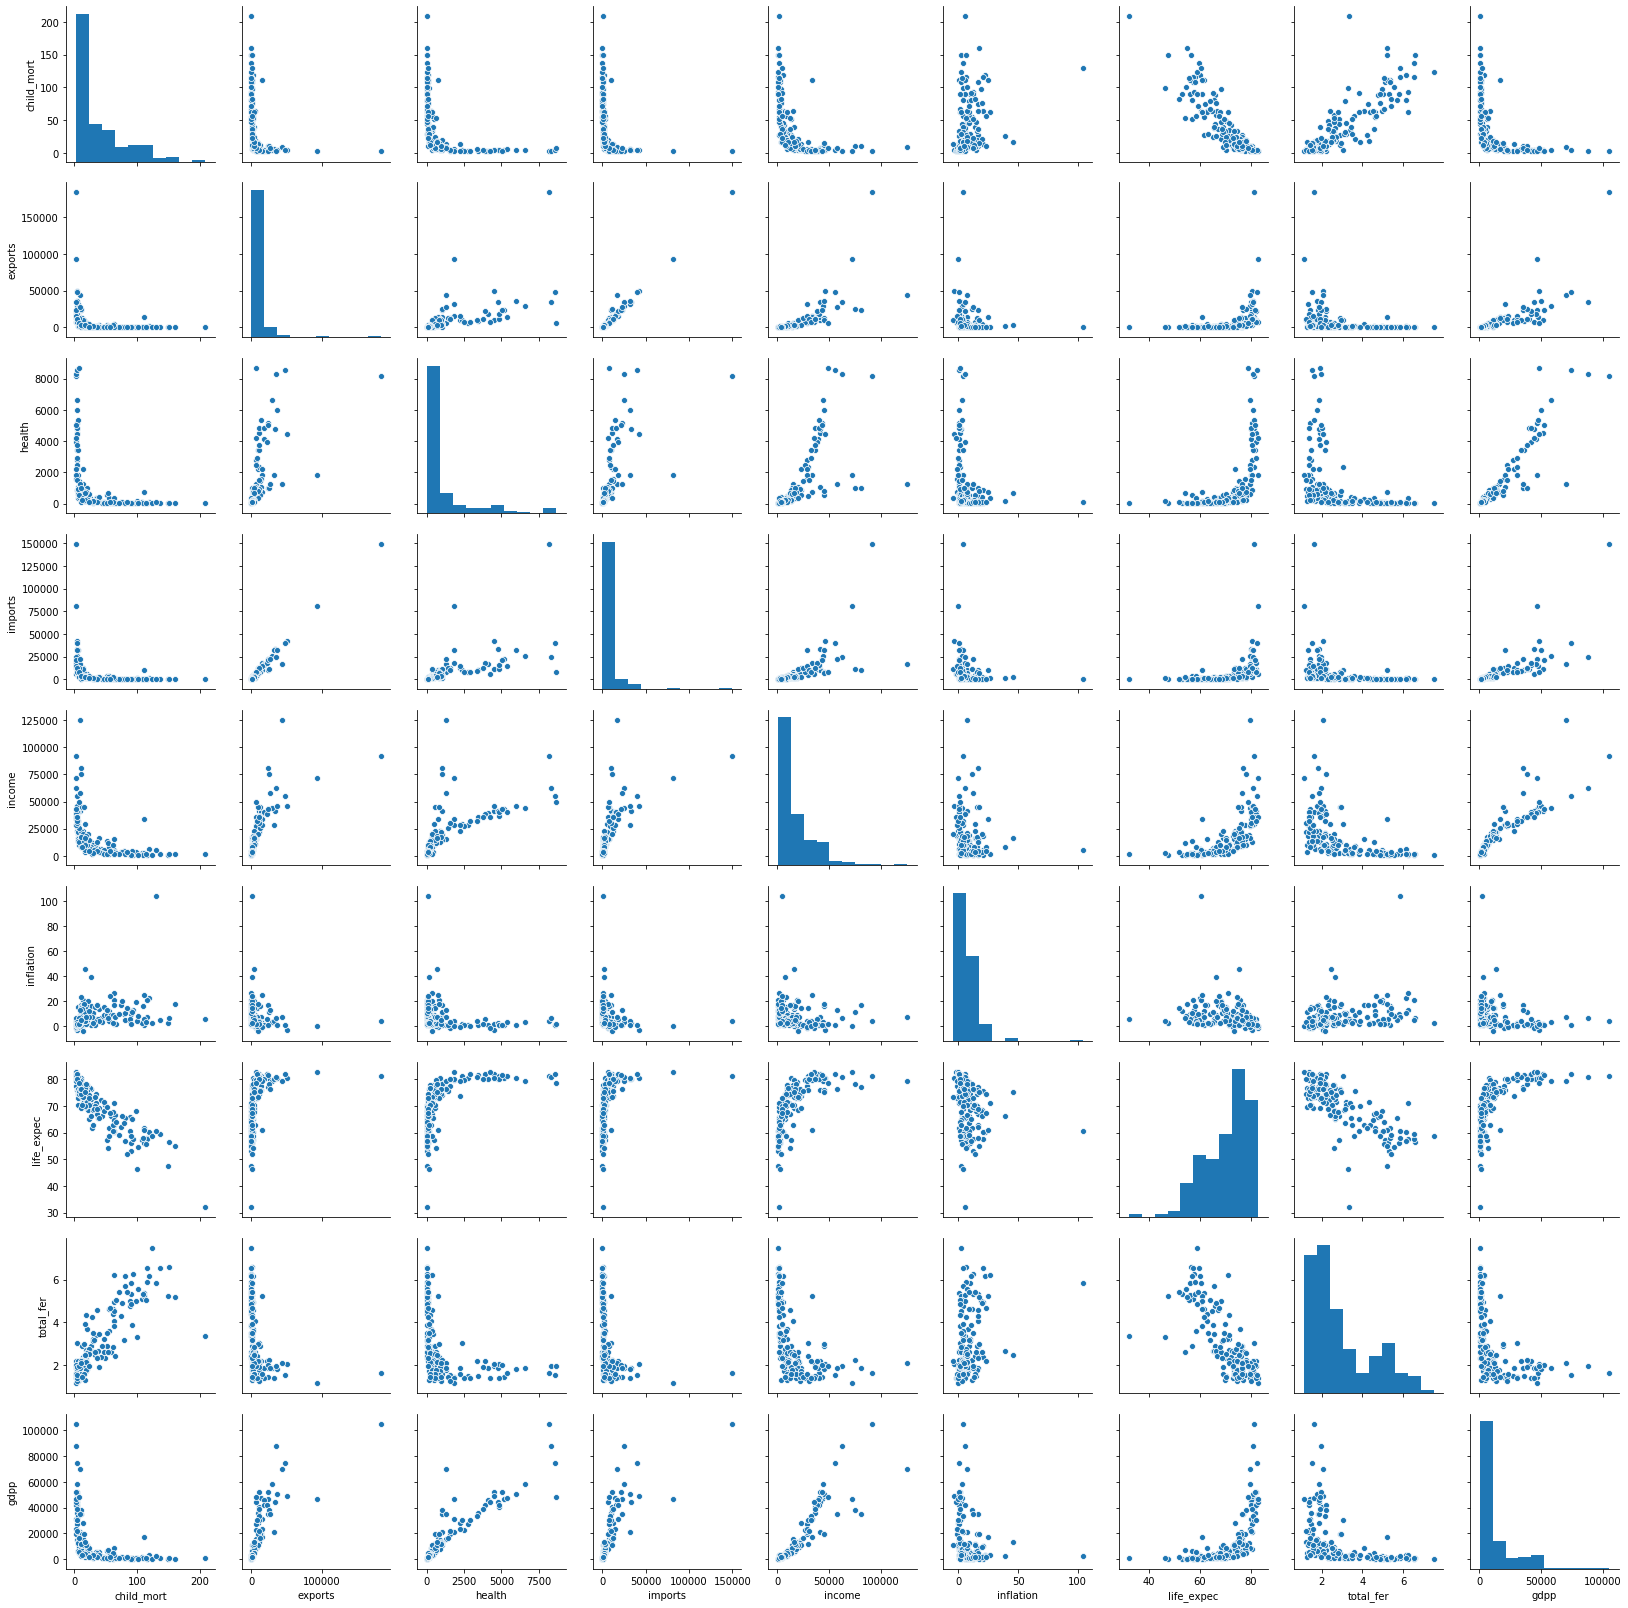

In [14]:
num = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

plt.figure(figsize = (20,8))
sns.pairplot(country[num])
plt.show()

# Outlier Analysis

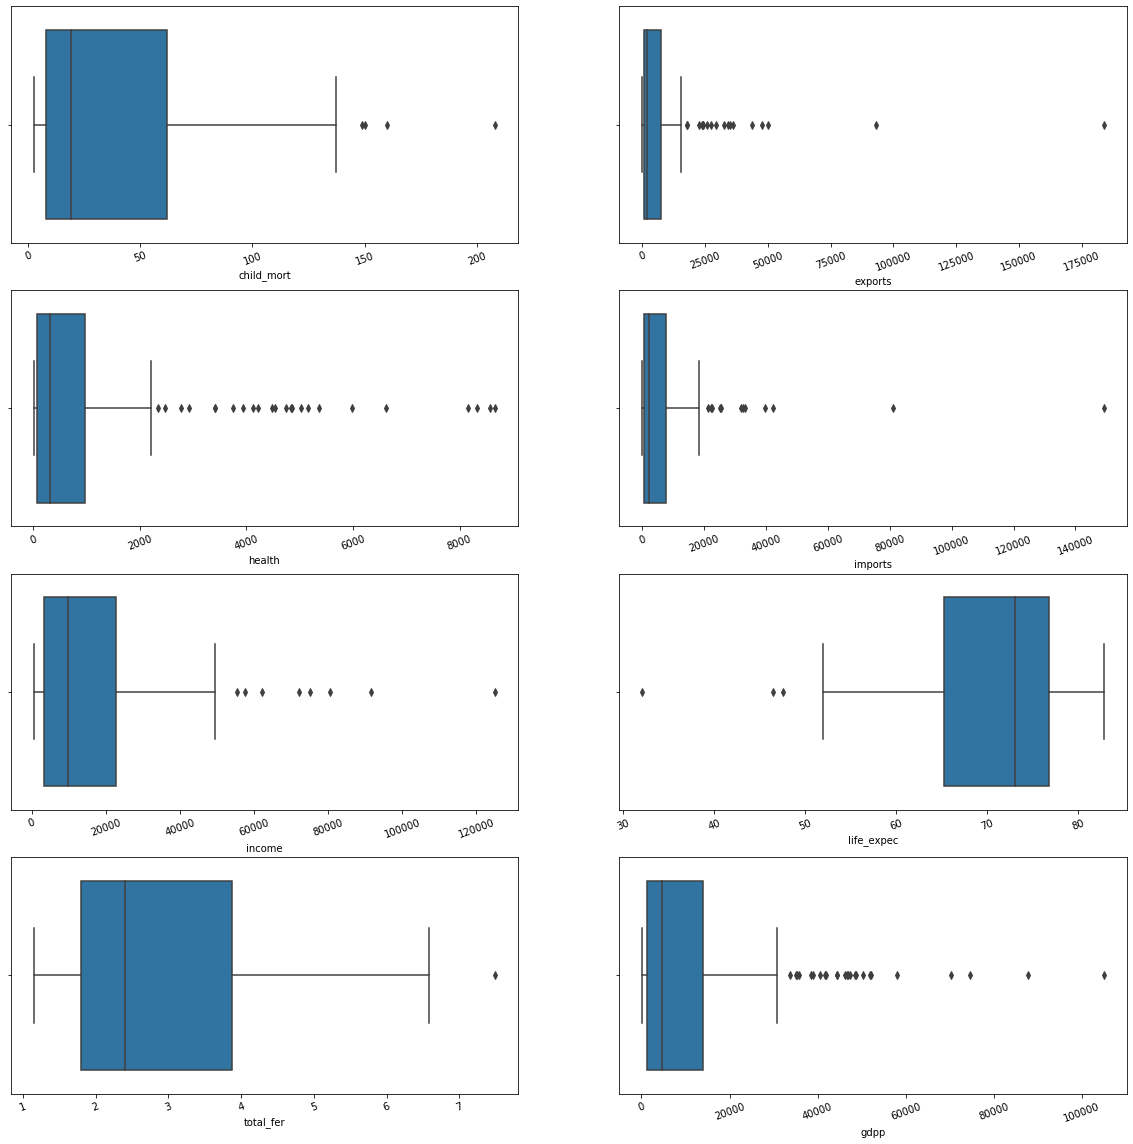

In [15]:
plt.figure(figsize=(20,20))
features = ['child_mort','exports','health','imports','income','life_expec','total_fer','gdpp']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=country)
    plt.xticks(rotation = 20)

# Capping method

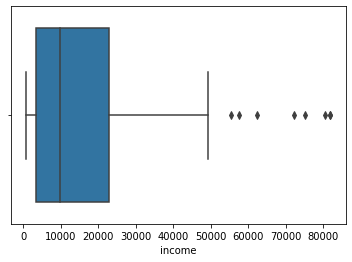

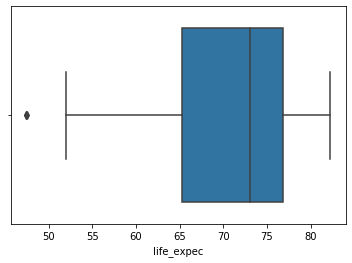

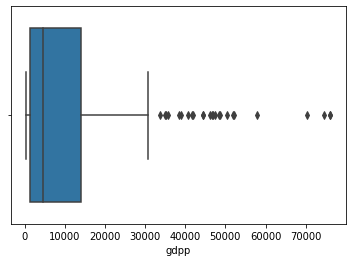

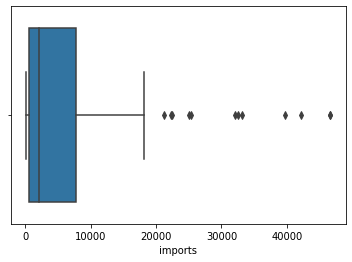

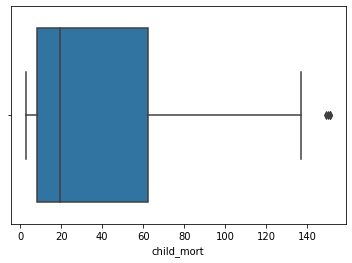

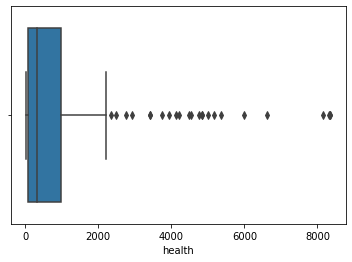

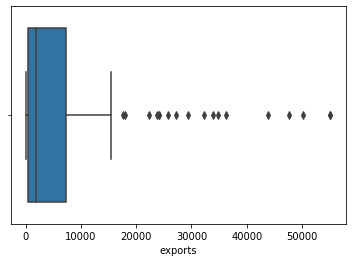

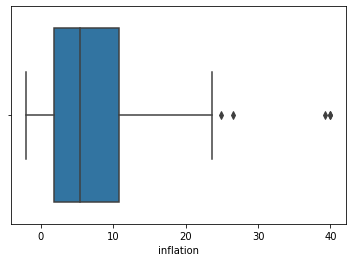

In [18]:
Q1 = country['income'].quantile(0.01)
Q4 = country['income'].quantile(0.99)
country['income'][country['income'] <= Q1]=Q1
country['income'][country['income'] >= Q4]=Q4
sns.boxplot(x='income', data=country)
plt.show()

Q1 = country['life_expec'].quantile(0.01)
Q4 = country['life_expec'].quantile(0.99)
country['life_expec'][country['life_expec'] <= Q1]=Q1
country['life_expec'][country['life_expec'] >= Q4]=Q4
sns.boxplot(x='life_expec', data=country)
plt.show()

Q1 = country['gdpp'].quantile(0.01)
Q4 = country['gdpp'].quantile(0.99)
country['gdpp'][country['gdpp'] <= Q1]=Q1
country['gdpp'][country['gdpp'] >= Q4]=Q4
sns.boxplot(x='gdpp', data=country)
plt.show()


Q1 = country['imports'].quantile(0.01)
Q4 = country['imports'].quantile(0.99)
country['imports'][country['imports'] <= Q1]=Q1
country['imports'][country['imports'] >= Q4]=Q4
sns.boxplot(x='imports', data=country)
plt.show()

Q1 = country['child_mort'].quantile(0.01)
Q4 = country['child_mort'].quantile(0.99)
country['child_mort'][country['child_mort'] <= Q1]=Q1
country['child_mort'][country['child_mort'] >= Q4]=Q4
sns.boxplot(x='child_mort', data=country)
plt.show()

Q1 = country['health'].quantile(0.01)
Q4 = country['health'].quantile(0.99)
country['health'][country['health'] <= Q1]=Q1
country['health'][country['health'] >= Q4]=Q4
sns.boxplot(x='health', data=country)
plt.show()

Q1 = country['exports'].quantile(0.01)
Q4 = country['exports'].quantile(0.99)
country['exports'][country['exports'] <= Q1]=Q1
country['exports'][country['exports'] >= Q4]=Q4
sns.boxplot(x='exports', data=country)
plt.show()

Q1 = country['inflation'].quantile(0.01)
Q4 = country['inflation'].quantile(0.99)
country['inflation'][country['inflation'] <= Q1]=Q1
country['inflation'][country['inflation'] >= Q4]=Q4
sns.boxplot(x='inflation', data=country)
plt.show()




# Hopkin

In [19]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
country_1  = country.drop('country',axis = 1)

In [21]:
hopkins(country_1)

0.9199893697447574

In [22]:
standard_scaler = StandardScaler()
country_1 = standard_scaler.fit_transform(country_1)

In [23]:
country_1 = pd.DataFrame(country_1)
country_1.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
country_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.347442,-0.588277,-0.567499,-0.621992,-0.855416,0.268366,-1.695788,1.902882,-0.705672
1,-0.547967,-0.487583,-0.440733,-0.426024,-0.387771,-0.377394,0.663612,-0.859973,-0.500564
2,-0.272411,-0.435157,-0.486684,-0.492190,-0.220835,1.137206,0.687088,-0.038404,-0.479108
3,2.089123,-0.390205,-0.534577,-0.479355,-0.614287,1.959082,-1.237994,2.128151,-0.533038
4,-0.710209,-0.080535,-0.178332,0.159595,0.127650,-0.775287,0.722303,-0.541946,-0.030271


# K-mean Clustering

In [24]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(country_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

# Finding the Optimal Number of Clusters
SSD

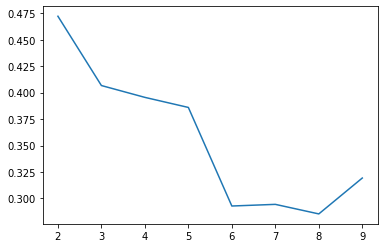

In [26]:
#First we'll do the silhouette score analysis
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(country_1)
    ss.append([k, silhouette_score(country_1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

In [27]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.4721302132246675
For n_clusters=3, the silhouette score is 0.40666711500230807
For n_clusters=4, the silhouette score is 0.3946060350646943
For n_clusters=5, the silhouette score is 0.38624871398392646
For n_clusters=6, the silhouette score is 0.29595981814379996
For n_clusters=7, the silhouette score is 0.2937520894447
For n_clusters=8, the silhouette score is 0.2959135767798075


# Elbow Curve plot and choose the optimal number of cluster

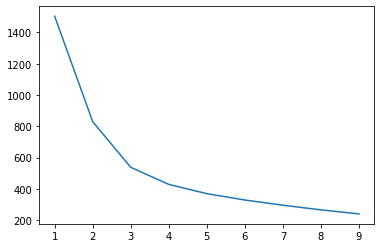

In [28]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(country_1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

# KMeans with the K the we have choosed

In [29]:
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(country_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [30]:
## Let's make a copy of our original data before using it for analysis
orginal_data = country.copy()

In [31]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [32]:
col = country.columns
col

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [33]:
# Let's add the cluster Ids to the original data 
country_km = pd.concat([country.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
country_km.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp','cluster_id']
country_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [34]:
country_km.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [35]:
country_km['cluster_id'].value_counts()

0    90
2    48
1    29
Name: cluster_id, dtype: int64

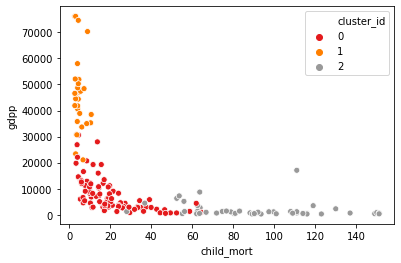

In [36]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = country_km, palette='Set1')


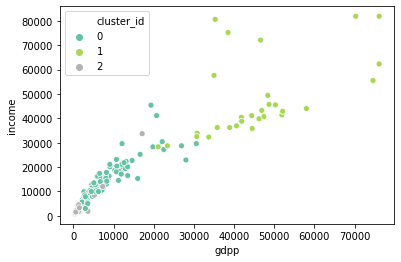

In [37]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = country_km, palette='Set2')

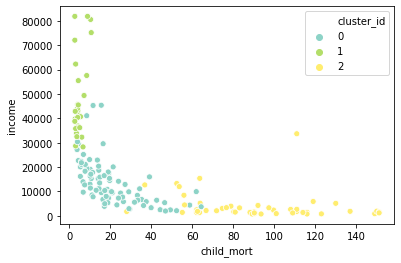

In [38]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_id', legend = 'full', data = country_km, palette='Set3')

# Cluster Profiling

In [39]:
country_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [40]:
country_km.groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,20.547778,3477.256916,528.894338,3589.346236,13804.333333,7.118210,73.393333,2.242444,7808.577778
1,4.989655,24739.293683,4235.375016,20713.779490,47612.631724,2.916945,80.445366,1.754138,45863.856552
2,90.241917,879.109263,114.959392,827.429588,3901.608400,10.577282,59.576433,4.992083,1911.466283


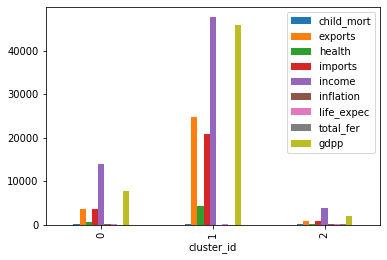

In [41]:
country_km.groupby('cluster_id').mean().plot(kind = 'bar')
plt.show()

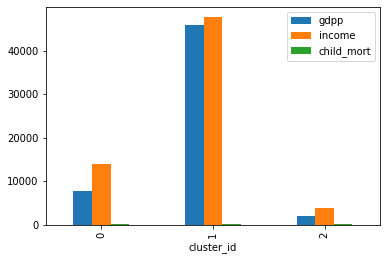

In [42]:
country_km[['gdpp','income', 'child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

In [43]:
country_km[country_km['cluster_id']==0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,0
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,0
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,0
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,0


In [44]:
country_km[country_km['cluster_id']==0]['country'].to_frame().head()

,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia


In [45]:
country_km[country_km['cluster_id']==0].sort_values(by=["gdpp", 'income','child_mort'], ascending=[True, True,False]).head() 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
109,Nepal,47.0,56.7136,31.0800,215.488,1990.0,15.10,68.3,2.61,592.0,0
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110.0,12.50,69.6,3.51,738.0,0
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440.0,7.14,70.4,2.33,758.0,0
27,Cambodia,44.4,425.2260,44.6448,467.670,2520.0,3.12,66.1,2.88,786.0,0
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790.0,10.00,68.5,3.10,880.0,0


# Hierarchical Clustering

In [46]:
country_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.347442,-0.588277,-0.567499,-0.621992,-0.855416,0.268366,-1.695788,1.902882,-0.705672
1,-0.547967,-0.487583,-0.440733,-0.426024,-0.387771,-0.377394,0.663612,-0.859973,-0.500564
2,-0.272411,-0.435157,-0.486684,-0.492190,-0.220835,1.137206,0.687088,-0.038404,-0.479108
3,2.089123,-0.390205,-0.534577,-0.479355,-0.614287,1.959082,-1.237994,2.128151,-0.533038
4,-0.710209,-0.080535,-0.178332,0.159595,0.127650,-0.775287,0.722303,-0.541946,-0.030271


In [47]:
country_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


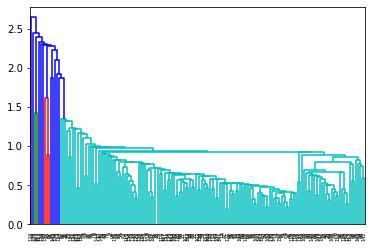

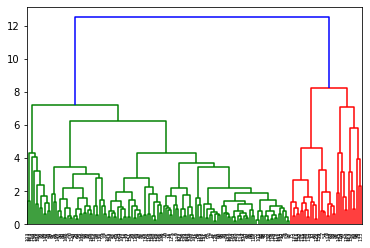

In [49]:
# complete linkage
mergings = linkage(country_1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [50]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [51]:
country_km['cluster_labels'] = cluster_labels
country_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0


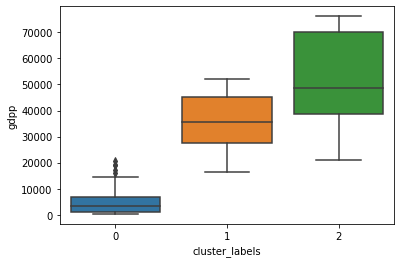

In [52]:
sns.boxplot(x='cluster_labels', y='gdpp', data=country_km)



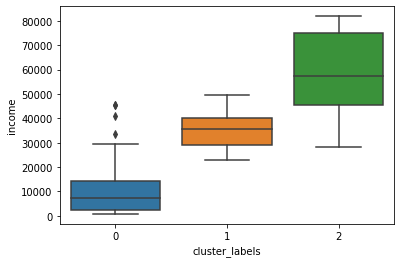

In [53]:
sns.boxplot(x='cluster_labels', y='income', data=country_km)

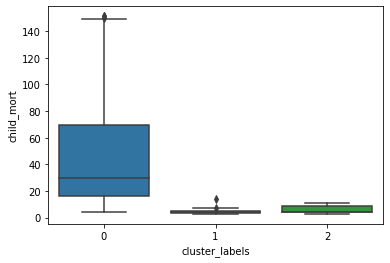

In [54]:
sns.boxplot(x='cluster_labels', y='child_mort', data=country_km)

In [55]:
country_km[country_km['cluster_labels']==0].sort_values(by=["gdpp", 'income','child_mort'], ascending =[True, True,False]).head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
88,Liberia,89.300,62.457000,38.586000,302.802000,756.6016,5.47,60.8000,5.02,333.1908,2,0
26,Burundi,93.600,22.800811,26.796000,109.791238,764.0000,12.30,57.7000,6.26,333.1908,2,0
37,"Congo, Dem. Rep.",116.000,137.274000,26.419400,165.664000,756.6016,20.80,57.5000,6.54,334.0000,2,0
112,Niger,123.000,77.256000,17.956800,170.868000,814.0000,2.55,58.8000,7.49,348.0000,2,0
132,Sierra Leone,151.156,67.032000,52.269000,137.655000,1220.0000,17.20,55.0000,5.20,399.0000,2,0
93,Madagascar,62.200,103.250000,17.498711,177.590000,1390.0000,8.79,60.8000,4.60,413.0000,2,0
106,Mozambique,101.000,131.985000,21.829900,193.578000,918.0000,7.64,54.5000,5.56,419.0000,2,0
31,Central African Republic,149.000,52.628000,17.750800,118.190000,888.0000,2.01,47.5000,5.21,446.0000,2,0
94,Malawi,90.500,104.652000,30.248100,160.191000,1030.0000,12.10,53.1000,5.31,459.0000,2,0
50,Eritrea,55.200,23.087800,17.498711,112.306000,1420.0000,11.60,61.7000,4.61,482.0000,2,0
